<a href="https://colab.research.google.com/github/archana070723/Womanium_project/blob/main/QuantumGaltonBoard_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 48.9 MB/s eta 0:00:00


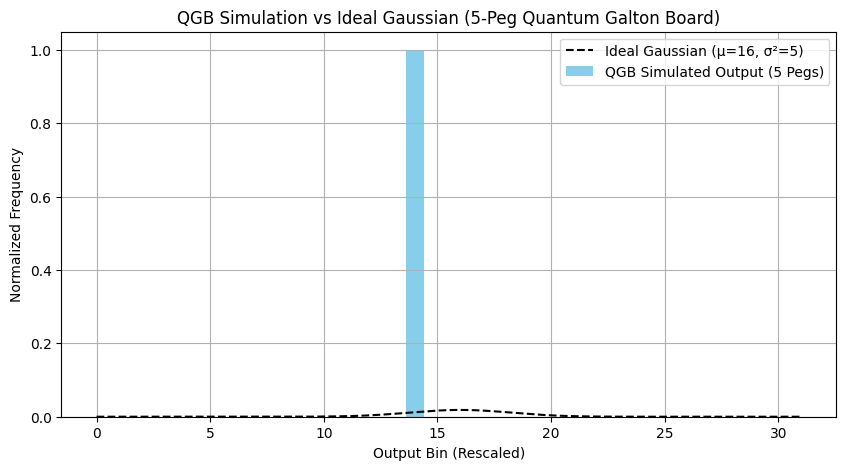

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from scipy.stats import norm

# 5 Pegs (needs 11 qubits: 1 control + 5 ball wires + 5 outputs)
shots = 1000
num_pegs = 5
num_qubits = 2 * num_pegs + 1 +num_pegs  # control + intermediate + outputs

# Define device
dev = qml.device("default.qubit", wires=num_qubits, shots=shots)

@qml.qnode(dev)
def qgb_5_pegs():
    # wire 0: control qubit
    # wires 1,3,5,7,9: intermediate ball wires
    # wires 2,4,6,8,10: output qubits (to be measured)

    # Initial: ball in middle wire (wire 5)
    qml.PauliX(wires=5)

    for i in range(num_pegs):
        control = 0
        wire_a = 1 + 2 * i
        wire_b = wire_a + 1
        wire_out = 2 * num_pegs + 1 + i  # assign to a clean output wire
        # wire_out = wire_b

        # Randomize control
        qml.Hadamard(wires=control)

        # CSWAP: swap ball wires if control is 1
        qml.ctrl(qml.SWAP, control=control)(wires=[wire_a, wire_b])
        qml.CNOT(wires=[wire_b, control])  # rebalance control
        qml.SWAP(wires=[wire_b, wire_out])  # move output to output wire

    return qml.sample(wires=[2, 4, 6, 8, 10])  # output wires

# Run simulation
samples = qgb_5_pegs()
weights = np.sum(samples, axis=1)  # Hamming weights = final bin
counts = Counter(weights)

# Normalize and plot
x_vals = np.array(sorted(counts.keys()))
simulated_probs = np.array([counts[x] / shots for x in x_vals])

# Ideal Gaussian
mu = 16
var = 5
sigma = np.sqrt(var)
x_smooth = np.linspace(0, 31, 300)
ideal_gaussian = norm.pdf(x_smooth, loc=mu, scale=sigma)
ideal_gaussian /= np.sum(ideal_gaussian)

# Rescale x_vals to match mu=16 scale
rescaled_x = 16 - (num_pegs // 2) + x_vals

# Plot
plt.figure(figsize=(10, 5))
plt.bar(rescaled_x, simulated_probs, width=0.8, label='QGB Simulated Output (5 Pegs)', color='skyblue')
plt.plot(x_smooth, ideal_gaussian, 'k--', label='Ideal Gaussian (μ=16, σ²=5)')
plt.xlabel("Output Bin (Rescaled)")
plt.ylabel("Normalized Frequency")
plt.title("QGB Simulation vs Ideal Gaussian (5-Peg Quantum Galton Board)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
##Ideal Exponential Distribution

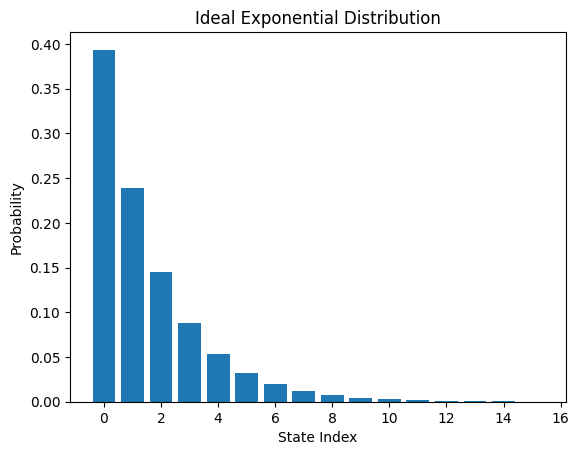

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 16
k = np.arange(N)
lmbda = 0.5
prob_ideal = lmbda * np.exp(-lmbda * k)
prob_ideal /= np.sum(prob_ideal)  # Normalize

plt.bar(k, prob_ideal)
plt.title("Ideal Exponential Distribution")
plt.xlabel("State Index")
plt.ylabel("Probability")
plt.show()


In [ ]:
##Ideal Hadamard Quantum Walk Distribution

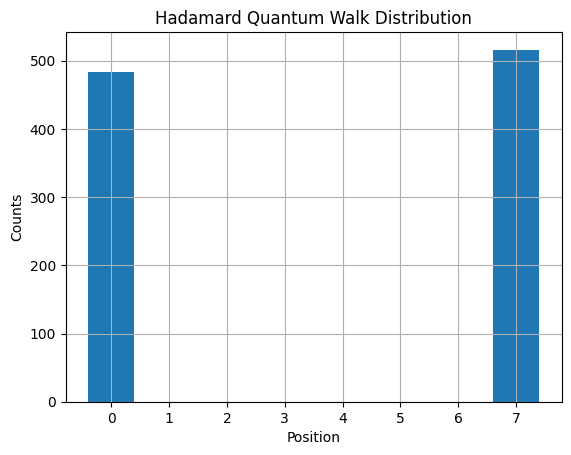

In [6]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Number of steps and qubits
num_steps = 5
num_position_qubits = 3  # for 8 positions
num_qubits = 1 + num_position_qubits  # 1 coin + position

dev = qml.device("default.qubit", wires=num_qubits, shots=1000)

def hadamard_walk_step(coin_wire, pos_wires):
    qml.Hadamard(wires=coin_wire)
    for i, wire in enumerate(pos_wires):
        qml.CNOT(wires=[coin_wire, wire])

@qml.qnode(dev)
def hadamard_quantum_walk():
    # Initialize: position at |000>, coin at |0>
    for _ in range(num_steps):
        hadamard_walk_step(0, list(range(1, num_qubits)))
    return qml.sample(wires=range(1, num_qubits))

# Run the quantum walk
samples = hadamard_quantum_walk()
samples = ["".join(map(str, sample)) for sample in samples]
counts = Counter(samples)

# Convert binary to integer positions
positions = sorted([int(b, 2) for b in counts.keys()])
values = [counts[format(pos, f"0{num_position_qubits}b")] for pos in positions]

# Plot
plt.bar(positions, values)
plt.xlabel("Position")
plt.ylabel("Counts")
plt.title("Hadamard Quantum Walk Distribution")
plt.grid(True)
plt.show()


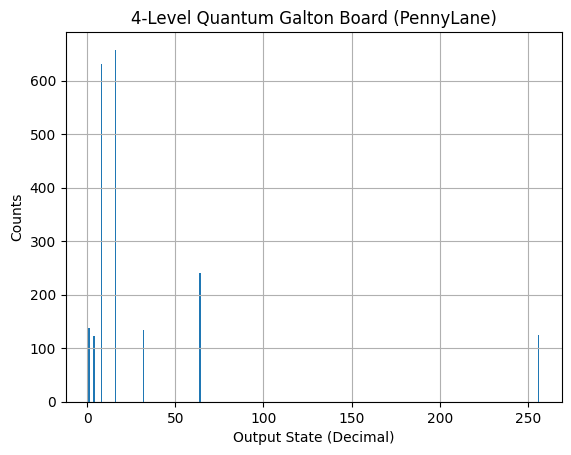

In [3]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Number of wires (1 control + 9 data qubits)
num_wires = 10
dev = qml.device("default.qubit", wires=num_wires, shots=2048)

def qgb_layer(control, qubit_pairs):
    qml.Hadamard(wires=control)
    for a, b in qubit_pairs:
        qml.CSWAP(wires=[control, a, b])
        qml.CNOT(wires=[b, control])

@qml.qnode(dev)
def qgb_circuit():
    # Reset control qubit and initialize the 'ball' on q5
    qml.PauliX(wires=5)

    # Layer 1
    qgb_layer(0, [(4, 5), (5, 6)])

    # Reset and layer 2
    qml.PauliX(wires=0)
    qgb_layer(0, [(3, 4), (4, 5), (6, 7), (5, 6)])

    # Reset and layer 3
    qml.PauliX(wires=0)
    qgb_layer(0, [(2, 3), (3, 4), (7, 8), (6, 7), (5, 6), (4, 5)])

    # Reset and layer 4
    qml.PauliX(wires=0)
    qgb_layer(0, [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)])

    return qml.sample(wires=range(1, 10))  # exclude control qubit

# Run the QGB circuit
samples = qgb_circuit()
samples = ["".join(map(str, s)) for s in samples]
counts = Counter(samples)

# Convert to integer positions
positions = sorted([int(state, 2) for state in counts.keys()])
values = [counts[format(pos, "09b")] for pos in positions]

# Plot
plt.bar(positions, values)
plt.xlabel("Output State (Decimal)")
plt.ylabel("Counts")
plt.title("4-Level Quantum Galton Board (PennyLane)")
plt.grid(True)
plt.show()


Counter({3: 1036, 2: 520, 0: 248, 1: 244})


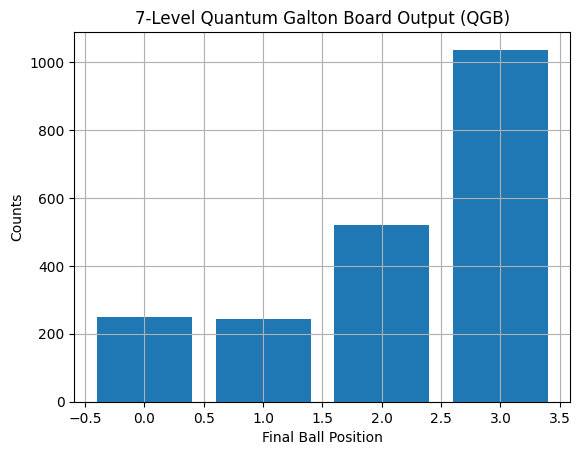

In [2]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Parameters
num_levels = 5
num_pos = num_levels + 1  # Number of position wires
num_qubits = num_pos + 1  # +1 for the control qubit
control_wire = 0
position_wires = list(range(1, num_qubits))

dev = qml.device("default.qubit", wires=num_qubits, shots=2048)

def qgb_layer(ctrl, wires):
    for i in range(len(wires) - 1):
        qml.Hadamard(wires=ctrl)
        qml.CSWAP(wires=[ctrl, wires[i], wires[i + 1]])

@qml.qnode(dev)
def qgb_n_level():
    # Initialize middle wire as the "ball"
    qml.PauliX(wires=position_wires[num_levels // 2])
    # Apply quantum peg logic for n levels
    qgb_layer(control_wire, position_wires)
    return qml.sample(wires=position_wires)

# Run the circuit
samples = qgb_n_level()
bitstrings = ["".join(str(bit) for bit in sample) for sample in samples]

# Convert each bitstring to a single integer position (only one qubit will be |1>)
positions = [s[::-1].index('1') for s in bitstrings]
counts = Counter(positions)
print(counts)
# Plot
plt.bar(counts.keys(), counts.values())
plt.xlabel("Final Ball Position")
plt.ylabel("Counts")
plt.title("7-Level Quantum Galton Board Output (QGB)")
plt.grid(True)
plt.show()


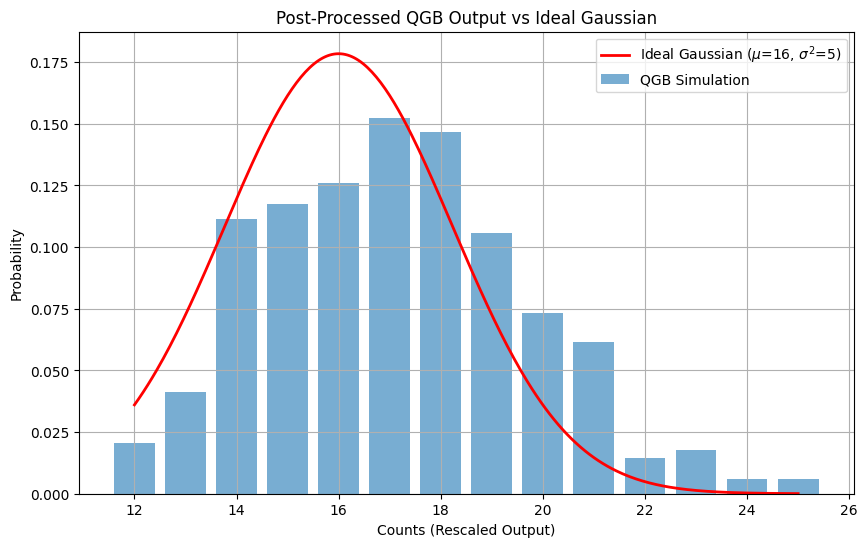

In [15]:
import numpy as onp  # Use NumPy for math
from scipy.stats import norm

# Step 1: Prepare x and y values for simulated output
x_vals = sorted(counts.keys())
y_vals = onp.array([counts[x] for x in x_vals])
y_vals = y_vals / sum(y_vals)  # Normalize to compare shape

# Step 2: Generate ideal Gaussian (same mean and variance)
mu = 16
sigma = np.sqrt(5)
x_smooth = np.linspace(min(x_vals), max(x_vals), 500)
ideal = norm.pdf(x_smooth, mu, sigma)
ideal = ideal / np.sum(ideal)  # Normalize ideal

# Convert binary samples to integers
mapped = [int("".join(map(str, s)), 2) for s in samples]

# Map each binary to a value from 0–4 (by Hamming weight or first-1 encoding)
substituted = []
for s in samples:
    for i in range(len(s)):
        if s[i] == 1:
            substituted.append(i)
            break
    else:
        substituted.append(0)  # fallback

# Postprocessing: group into blocks of 8 and sum
block_size = 6
rescaled = [sum(substituted[i:i+block_size]) for i in range(0, len(substituted)-block_size+1, block_size)]

# Count frequencies
counts = dict(Counter(rescaled))
x_vals = sorted(counts.keys())
y_vals = np.array([counts[k] for k in x_vals])
y_vals = y_vals / y_vals.sum()  # normalize

# Ideal Gaussian
mu = 16
sigma = np.sqrt(5)
x_smooth = np.linspace(min(x_vals), max(x_vals), 300)
ideal = norm.pdf(x_smooth, loc=mu, scale=sigma)
ideal = ideal #/ ideal.sum()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x_vals, y_vals, width=0.8, label="QGB Simulation", alpha=0.6)
plt.plot(x_smooth, ideal, 'r-', lw=2, label="Ideal Gaussian ($\mu$=16, $\sigma^2$=5)")
plt.xlabel("Counts (Rescaled Output)")
plt.ylabel("Probability")
plt.title("Post-Processed QGB Output vs Ideal Gaussian")
plt.legend()
plt.grid(True)
plt.show()


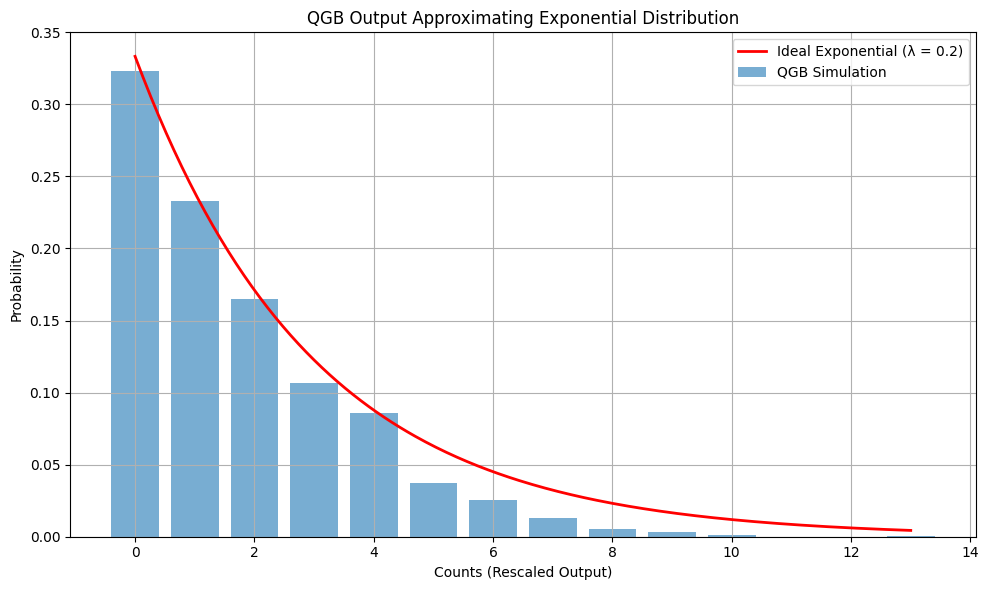

In [22]:
import pennylane as qml
from pennylane import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from scipy.stats import expon

# Setup device
n_wires = 5
shots = 20000
dev = qml.device("default.qubit", wires=n_wires, shots=shots)

@qml.qnode(dev)
def qgb_exponential():
    # Prepare a biased initial state to simulate an exponential decay
    for i in range(n_wires):
        angle = np.pi / (2 * (i + 1))  # larger angle for lower indices
        qml.RY(angle, wires=i)
    return qml.sample(wires=range(n_wires))

# Execute the circuit
samples = qgb_exponential()

# Convert bitstrings to position (first '1' bit index)
substituted = []
for s in samples:
    for i in range(len(s)):
        if s[i] == 1:
            substituted.append(i)
            break
    else:
        substituted.append(0)

# Group in blocks and sum to scale
block_size = 8
rescaled = [sum(substituted[i:i+block_size]) for i in range(0, len(substituted)-block_size+1, block_size)]

# Simulated frequencies
counts = dict(Counter(rescaled))
x_vals = sorted(counts.keys())
y_vals = np.array([counts[x] for x in x_vals])
y_vals = y_vals / np.sum(y_vals)

# Ideal exponential distribution (λ = 1/scale)
loc = 0
scale = 3
x_smooth = np.linspace(min(x_vals), max(x_vals), 300)
ideal_exp = expon.pdf(x_smooth, loc=loc, scale=scale)
ideal_exp = ideal_exp #/ np.sum(ideal_exp)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x_vals, y_vals, width=0.8, alpha=0.6, label="QGB Simulation")
plt.plot(x_smooth, ideal_exp, 'r-', lw=2, label="Ideal Exponential (λ = 0.2)")
plt.xlabel("Counts (Rescaled Output)")
plt.ylabel("Probability")
plt.title("QGB Output Approximating Exponential Distribution")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


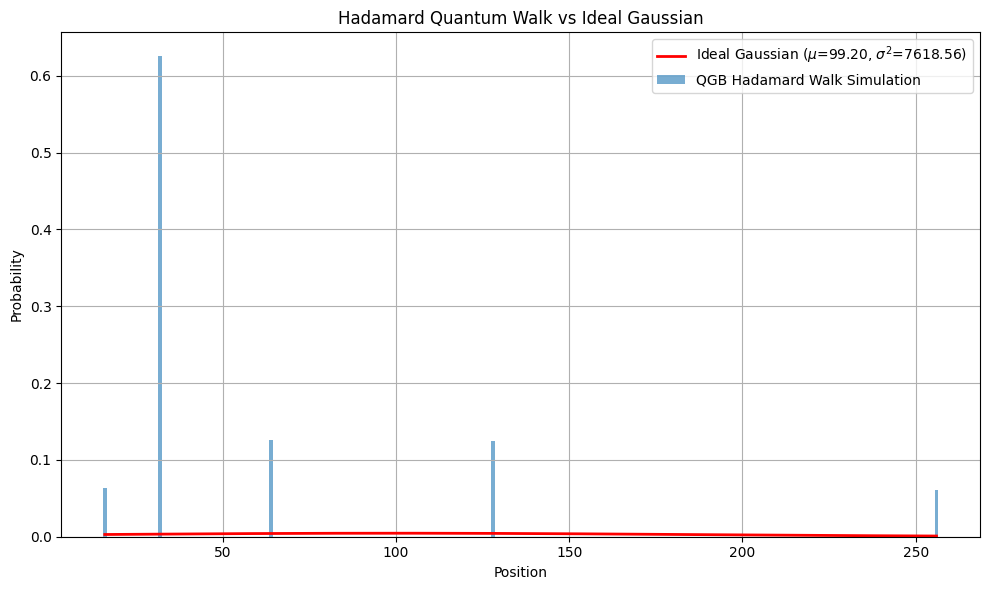

In [23]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import norm

# Parameters
n_steps = 4  # Number of walk steps
n_qubits = 2 * n_steps + 1  # Position qubits
shots = 20000

dev = qml.device("default.qubit", wires=n_qubits + 1, shots=shots)  # +1 for coin qubit

@qml.qnode(dev)
def hadamard_quantum_walk():
    # Define coin and position qubits
    coin = 0
    pos_qubits = list(range(1, n_qubits + 1))
    center = len(pos_qubits) // 2

    # Initialize the walker at the center
    qml.PauliX(wires=pos_qubits[center])

    # Perform quantum walk
    for _ in range(n_steps):
        qml.Hadamard(wires=coin)
        # Controlled shifts (approximation of quantum walk step)
        for i in range(len(pos_qubits) - 1):
            qml.CSWAP(wires=[coin, pos_qubits[i], pos_qubits[i+1]])

    return qml.sample(wires=pos_qubits)

# Run circuit
samples = hadamard_quantum_walk()

# Convert to decimal position based on binary bitstring
positions = [int("".join(str(b) for b in sample), 2) for sample in samples]

# Count frequencies
counts = dict(Counter(positions))
x_vals = sorted(counts.keys())
y_vals = np.array([counts[x] for x in x_vals])
y_vals = y_vals / y_vals.sum()  # Normalize

# Ideal Gaussian
mu = np.mean(x_vals)
var = np.var(x_vals)
sigma = np.sqrt(var)
x_smooth = np.linspace(min(x_vals), max(x_vals), 300)
ideal_gaussian = norm.pdf(x_smooth, loc=mu, scale=sigma)
ideal_gaussian = ideal_gaussian #/ np.sum(ideal_gaussian)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x_vals, y_vals, width=1.0, alpha=0.6, label="QGB Hadamard Walk Simulation")
plt.plot(x_smooth, ideal_gaussian, 'r-', lw=2, label=f"Ideal Gaussian ($\mu$={mu:.2f}, $\sigma^2$={var:.2f})")
plt.xlabel("Position")
plt.ylabel("Probability")
plt.title("Hadamard Quantum Walk vs Ideal Gaussian")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

